In [1]:
import yfinance as yf

# Get most active tickers (example list — you can scrape or use an API for real-time)
tickers = ['AAPL', 'TSLA', 'AMZN', 'NVDA', 'MSFT', 'GOOGL', 'META', 'AMD', 'NFLX', 'INTC']
data = yf.download(tickers, period="1d", interval="1m", group_by='ticker')


C:\Users\ravis\AppData\Local\Temp\ipykernel_5624\3825814044.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1d", interval="1m", group_by='ticker')
[*********************100%***********************]  10 of 10 completed


In [2]:
import pandas as pd

activity = []
for ticker in tickers:
    df = data[ticker]
    avg_volume = df['Volume'].mean()
    last_price = df['Close'].iloc[-1]
    activity.append({'Ticker': ticker, 'AvgVolume': avg_volume, 'LastPrice': last_price})

df_activity = pd.DataFrame(activity)
top10 = df_activity.sort_values(by='AvgVolume', ascending=False).head(10)


In [3]:
top10

,Ticker,AvgVolume,LastPrice
3,NVDA,367144.992063,145.470001
1,TSLA,239260.539683,322.095001
9,INTC,227346.257294,21.475000
7,AMD,125629.743386,126.790001
0,AAPL,90479.970899,196.250000
2,AMZN,85103.663130,212.554993
5,GOOGL,61625.476190,173.309998
4,MSFT,31119.796834,480.239990
6,META,20086.912929,695.400024
8,NFLX,5792.751397,1222.199951


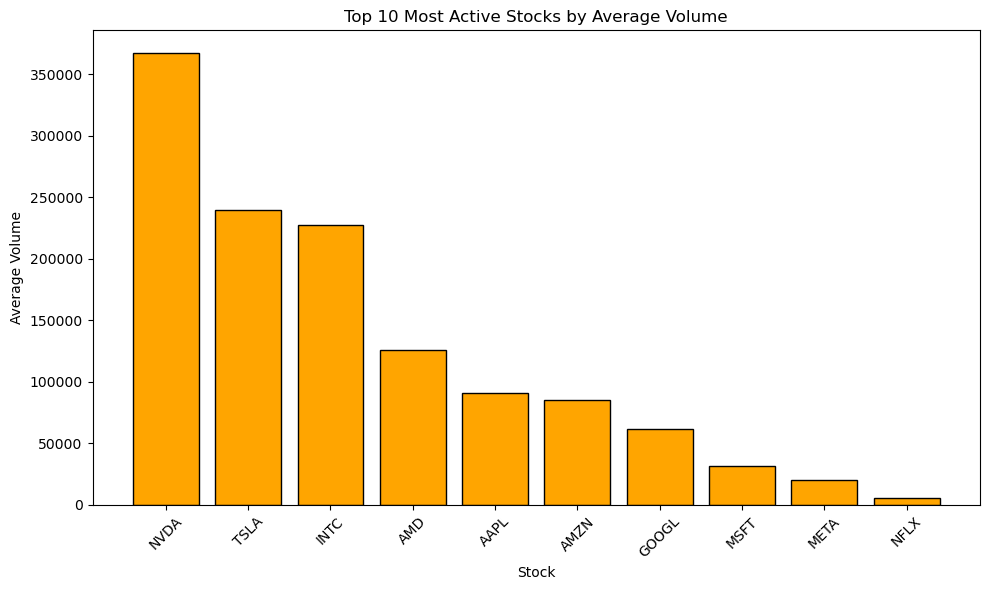

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top10['Ticker'], top10['AvgVolume'], color='orange', edgecolor='black')
plt.title('Top 10 Most Active Stocks by Average Volume')
plt.xlabel('Stock')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ravis\AppData\Local\Temp\ipykernel_5624\2589769972.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='1mo', interval='1d', group_by='ticker')
[*********************100%***********************]  10 of 10 completed


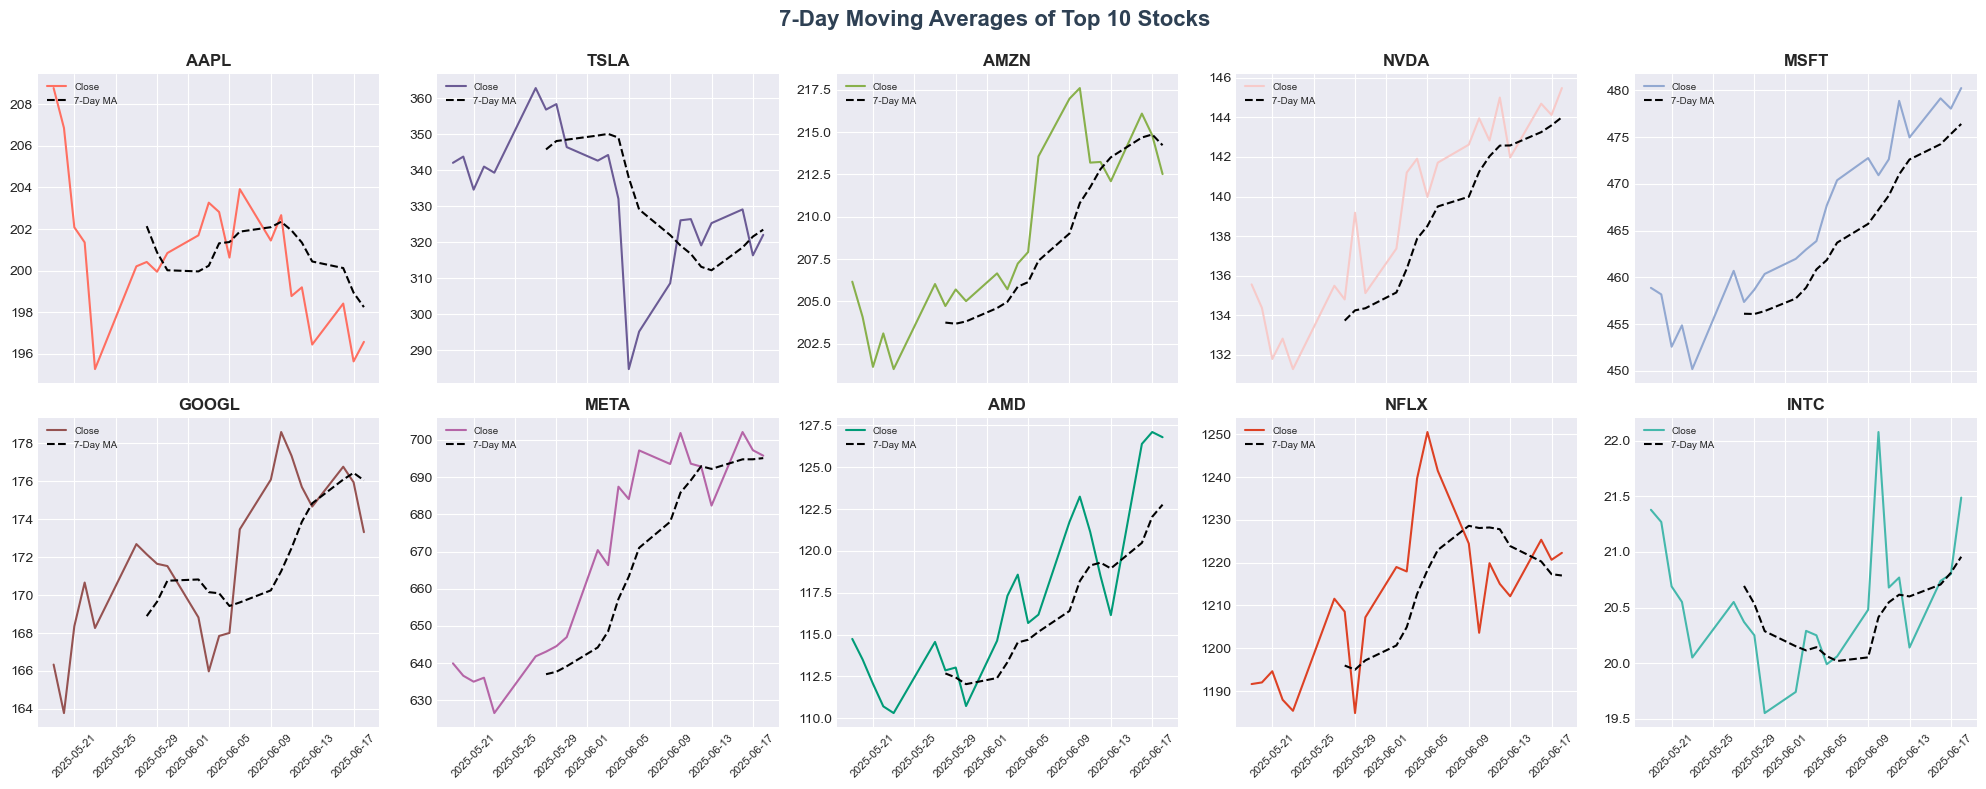

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 🎨 Aesthetic styling
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1',
          '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC']

# 📈 Tickers to visualize
tickers = ['AAPL', 'TSLA', 'AMZN', 'NVDA', 'MSFT', 'GOOGL', 'META', 'AMD', 'NFLX', 'INTC']

# 📥 Download historical data (1 month, daily)
data = yf.download(tickers, period='1mo', interval='1d', group_by='ticker')

# 🎯 Set up a grid of subplots (2 rows x 5 columns)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), sharex=True)
axes = axes.flatten()

# 🔁 Plot each stock's Close + 7-day Moving Average
for i, ticker in enumerate(tickers):
    df = data[ticker].copy()
    df['7MA'] = df['Close'].rolling(window=7).mean()

    axes[i].plot(df.index, df['Close'], label='Close', color=colors[i])
    axes[i].plot(df.index, df['7MA'], label='7-Day MA', color='black', linestyle='--')
    axes[i].set_title(ticker, fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

# 🧾 Optional: Add the legend to every subplot or just one
for ax in axes:
    ax.legend(loc='upper left', fontsize=7)

# 🏷️ Final touches
fig.suptitle('7-Day Moving Averages of Top 10 Stocks', fontsize=16, fontweight='bold', color='#2E4053')
plt.tight_layout()
plt.subplots_adjust(top=0.90)  # Make space for suptitle

# 💾 Save and/or display
plt.savefig(r'C:\Users\ravis\OneDrive\Desktop\github\top10_stocks_ma.png', dpi=300, bbox_inches='tight')
plt.show()